
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
## library imports here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn import tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


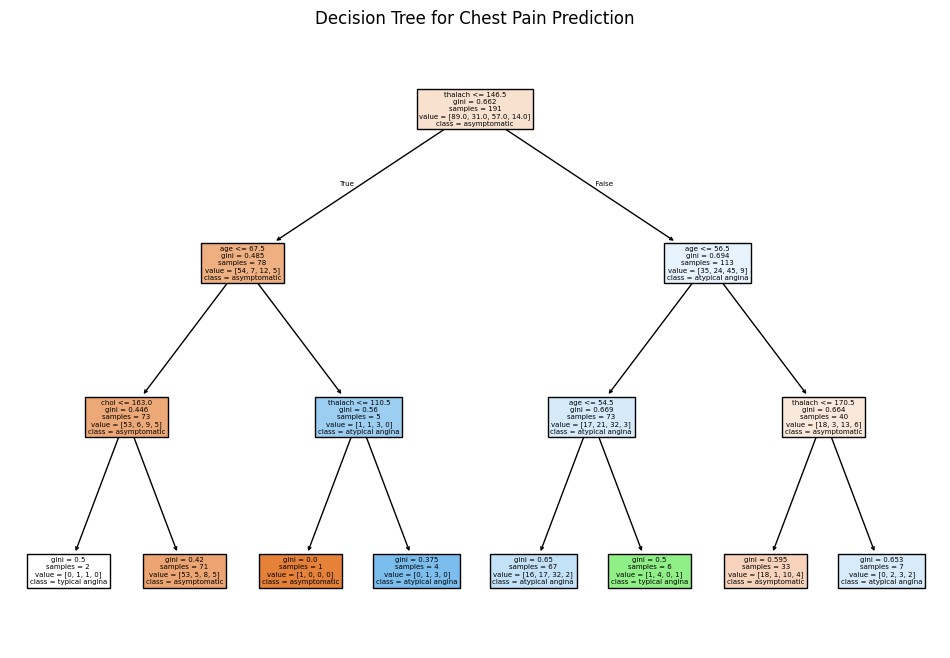

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


('                  precision    recall  f1-score   support\n\n    asymptomatic       0.56      0.77      0.65        39\n  typical angina       0.12      0.08      0.10        13\n atypical angina       0.33      0.25      0.29        24\nnon-anginal pain       0.00      0.00      0.00         6\n\n        accuracy                           0.45        82\n       macro avg       0.25      0.27      0.26        82\n    weighted avg       0.38      0.45      0.41        82\n',
 '                  precision    recall  f1-score   support\n\n    asymptomatic       0.60      0.64      0.62        39\n  typical angina       1.00      0.15      0.27        13\n atypical angina       0.37      0.58      0.45        24\nnon-anginal pain       0.00      0.00      0.00         6\n\n        accuracy                           0.50        82\n       macro avg       0.49      0.34      0.33        82\n    weighted avg       0.55      0.50      0.47        82\n',
 '                  precision    recal

In [ ]:
X = ha[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach']]
y = ha['cp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

# Fitting a Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal pain'], filled=True)
plt.title("Decision Tree for Chest Pain Prediction")
plt.show()

lda = LinearDiscriminantAnalysis()

# Fitting the LDA model to the training data
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

# Evaluation
knn_report = classification_report(y_test, knn_pred, target_names=['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal pain'])
dt_report = classification_report(y_test, dt_pred, target_names=['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal pain'])
lda_report = classification_report(y_test, lda_pred, target_names=['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal pain'])

(knn_report, dt_report, lda_report)

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
# Create a new column for each cp category and fit logistic regression models
f1_scores = {}
for category in range(4):
    ha[f'cp_is_{category}'] = (ha['cp'] == category).astype(int)

    # Define target variable for the current category
    y_category = ha[f'cp_is_{category}']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_category, test_size=0.3, random_state=42, stratify=y_category)

    # Fit logistic regression model
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores[f'cp_is_{category}'] = f1


f1_scores

{'cp_is_0': 0.6233766233766234,
 'cp_is_1': 0.0,
 'cp_is_2': 0.12903225806451613,
 'cp_is_3': 0.0}

The best category is when chest pain is 0

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [ ]:
# Function to compare two categories using OvO logistic regression and calculate ROC-AUC
def ovo_logreg_auc(category1, category2):
    # Filter dataset for the two categories
    ha_ovo = ha[(ha['cp'] == category1) | (ha['cp'] == category2)]

    # Create binary target variable
    ha_ovo['cp_binary'] = (ha_ovo['cp'] == category2).astype(int)

    # Define features and target
    X_ovo = ha_ovo[['age', 'sex', 'trtbps', 'chol', 'restecg', 'thalach']]
    y_ovo = ha_ovo['cp_binary']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_ovo, y_ovo, test_size=0.3, random_state=42, stratify=y_ovo)

    # Fit logistic regression model
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred_prob = logreg.predict_proba(X_test)[:, 1]

    # Calculate ROC-AUC
    auc = roc_auc_score(y_test, y_pred_prob)
    return auc

# Calculate ROC-AUC for each pair
auc_0_1 = ovo_logreg_auc(0, 1)
auc_0_2 = ovo_logreg_auc(0, 2)
auc_0_3 = ovo_logreg_auc(0, 3)

# Store results in a dictionary and find the best pair
auc_results = {
    '0 vs 1': auc_0_1,
    '0 vs 2': auc_0_2,
    '0 vs 3': auc_0_3
}

auc_results

<ipython-input-18-43561ce65867>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ha_ovo['cp_binary'] = (ha_ovo['cp'] == category2).astype(int)
<ipython-input-18-43561ce65867>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ha_ovo['cp_binary'] = (ha_ovo['cp'] == category2).astype(int)
<ipython-input-18-43561ce65867>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

{'0 vs 1': 0.719921104536489,
 '0 vs 2': 0.7991452991452991,
 '0 vs 3': 0.6837606837606838}

The best pair is 0 and 2